In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('kc_house_data.csv')

In [2]:
df=df.drop(["id", "date"], axis= 1)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

def regression(df, n_features):
    y =df[["price"]]
    X = df.drop(["price"], axis= 1)
    X = X.iloc[:, :n_features+1]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=1)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    return (mse, mae)

In [4]:
mse, mae = [], []
for i in range(1,df.shape[1]):
    results = regression(df, i)
    mse.append(results[0])
    mae.append(results[1])
    

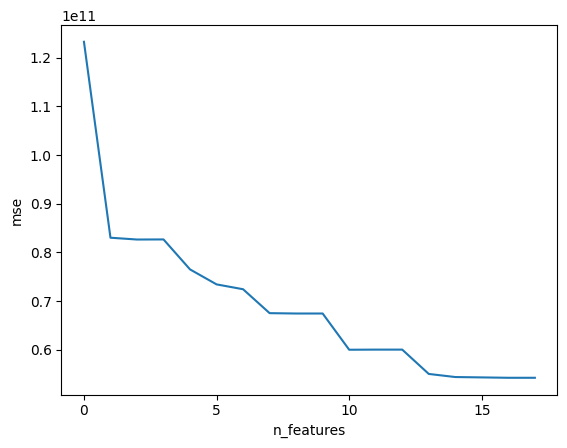

In [5]:
import matplotlib.pyplot as plt
plt.plot(mse)
plt.xlabel('n_features')
plt.ylabel('mse')
plt.locator_params(integer=True)

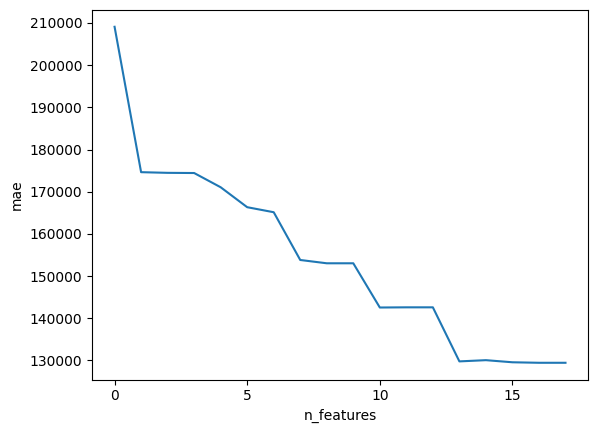

In [6]:
plt.plot(mae)
plt.xlabel('n_features')
plt.ylabel('mae')
plt.locator_params(integer=True)